## Data Handling Techniques used of Customer Churn Prediction Dataset.

Import Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load data

In [3]:
df = pd.read_csv("/content/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1950,9614-RMGHA,Male,0,Yes,No,65,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),91.85,5940.85,Yes
5833,4976-LNFVV,Male,1,Yes,No,19,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),34.30,577.15,No
1025,7868-TMWMZ,Female,1,Yes,No,60,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,6668.35,No
3624,9544-PYPSJ,Female,1,Yes,Yes,62,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),96.10,6019.35,No
4375,9896-UYMIE,Male,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),114.30,7383.7,No


Checking data imbalance

In [4]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


We can see that there is data imbalance.

## EDA

In [5]:
#drop customer ID column
df.drop('customerID',axis='columns',inplace=True)

In [6]:
#checking datatypes of columns
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [7]:
#convert TotalCharges column to numeric

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors ='coerce')

In [8]:
df.TotalCharges.dtypes

dtype('float64')

In [9]:
#checking for null values in TotalCharges
df.TotalCharges.isnull().sum()

11

In [10]:
#removing null values
df = df[df.TotalCharges.notnull()]

In [12]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [14]:
#function to print unique values in each column of df
def unique_values(df):
  for col in df:
    print(f'{col} : {df[col].unique()}')


In [15]:
unique_values(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [16]:
# Replacing values with No
df.replace('No phone service','No', inplace=True)
df.replace('No internet service','No', inplace=True)

In [17]:
unique_values(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [18]:
#mapping Yes:1 and No:0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df[col].replace({'Yes':1, 'No':0}, inplace=True)

In [19]:
unique_values(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
#generating dummies for categorical values
df = pd.get_dummies(data = df,  columns=['InternetService', 'Contract', 'PaymentMethod'], dtype='int')
unique_values(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [22]:
#mapping Male:1 and Female:0
df.gender.replace({'Male':1, 'Female':0}, inplace=True)
unique_values(df)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [24]:
tenure_churn_yes = df[df.Churn == 1].tenure
tenure_churn_no = df[df.Churn == 0].tenure

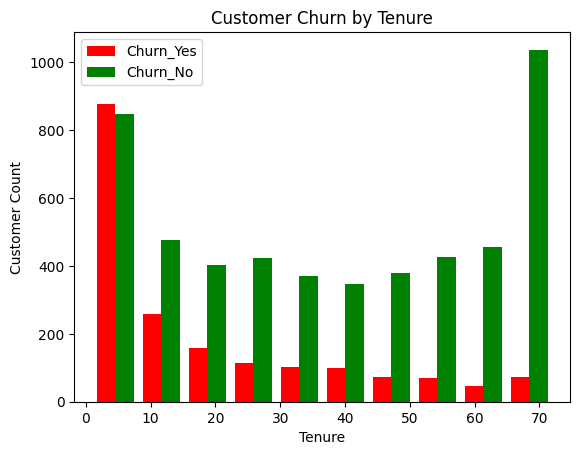

In [27]:
# plotting tenure v/s Customer count
plt.title('Customer Churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Customer Count')
plt.hist([tenure_churn_yes, tenure_churn_no], color =['red','green'], label=['Churn_Yes', 'Churn_No'])
plt.legend()

In [28]:
Monthlycharge_churn_yes = df[df.Churn == 1].MonthlyCharges
Monthlycharge_churn_no = df[df.Churn == 0].MonthlyCharges

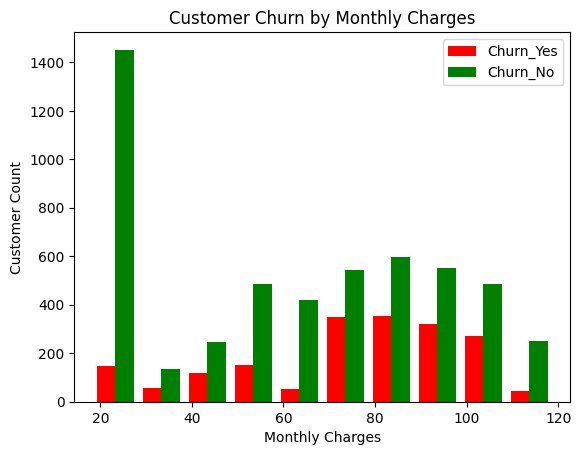

In [30]:
#plotting Monthly charges v/s Customer Count
plt.title('Customer Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Customer Count')
plt.hist([Monthlycharge_churn_yes, Monthlycharge_churn_no], color =['red','green'], label=['Churn_Yes', 'Churn_No'])
plt.legend()

In [31]:
#Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
unique_values(df)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [32]:
#creating X and y
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [33]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

In [35]:
#checking if Churn data is divided equally
count = y_train.value_counts()

ratio = count[0]/count[1]
print(ratio)

2.762541806020067


In [36]:
count = y_test.value_counts()

ratio = count[0]/count[1]
print(ratio)

2.7620320855614975


In [37]:
X_train.shape

(5625, 26)

In [40]:
#creating function for neural network model
import tensorflow
from tensorflow import keras
from sklearn.metrics import classification_report

def ANN(X_train, X_test, y_train, y_test,epoch):
  model = keras.Sequential([
      keras.layers.Dense(26, input_shape=(26,), activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer ='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  model.fit(X_train, y_train, epochs=epoch)
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  return y_preds




In [41]:
y_pred = ANN(X_train, X_test, y_train, y_test, epoch=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6579 - loss: 0.5906
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4289
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4278
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 0.4124
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8070 - loss: 0.4095
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8077 - loss: 0.4111
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4073
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4110
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8158 - loss: 0.3942
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8074 - loss: 0.4052
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8106 - loss: 0.4046
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

## Mitigating Skewdness of Data

### Method 1: Undersampling

In [42]:
count_0, count_1 = df.Churn.value_counts()

df_churn_0 = df[df.Churn == 0]
df_churn_1 = df[df.Churn ==1]

In [44]:
count_0, count_1

(5163, 1869)

In [43]:
df_churn_0.shape, df_churn_1.shape

((5163, 27), (1869, 27))

In [45]:
df_churn_0_under = df_churn_0.sample(count_1)

df_churn_0_under.shape

(1869, 27)

In [48]:
df_test_under = pd.concat([df_churn_0_under, df_churn_1], axis=0)
df_test_under.Churn.value_counts()

,count
Churn,
0,1869
1,1869


In [49]:
X = df_test_under.drop(columns='Churn', axis=1)
y = df_test_under['Churn']

In [50]:
X.shape

(3738, 26)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

In [52]:
y_pred = ANN(X_train, X_test, y_train, y_test, epoch=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5725 - loss: 0.6759
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7361 - loss: 0.5559
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7329 - loss: 0.5254
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7561 - loss: 0.5036
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.4908
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.5168
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7524 - loss: 0.4918
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7544 - loss: 0.4903
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7461 - loss: 0.4908
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.4797
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7673 - loss: 0.4807
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy:

Check classification report above. f1-score for minority class 1 improved from 0.56 to 0.75. Score for class 0 reduced to 0.74 from 0.86 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method 2: Oversampling

In [53]:
count_0, count_1

(5163, 1869)

In [58]:
df_count_1_over = df_churn_1.sample(count_0, replace=True)

df_test_over = pd.concat([df_churn_0, df_count_1_over], axis=0)
df_test_over.Churn.value_counts()

,count
Churn,
0,5163
1,5163


In [60]:
X = df_test_over.drop(columns='Churn',axis=1)
y = df_test_over['Churn']

In [63]:
X.shape

(10326, 26)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

In [64]:
y_pred = ANN(X_train, X_test, y_train, y_test, epoch=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6324 - loss: 0.6353
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7597 - loss: 0.4980
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7661 - loss: 0.4875
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7734 - loss: 0.4773
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.4806
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7737 - loss: 0.4713
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7854 - loss: 0.4659
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7731 - loss: 0.4709
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7778 - loss: 0.4607
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.4597
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7729 - loss: 0.4679
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

Check classification report above. f1-score for minority class 1 improved from 0.56 to 0.80. Score for class 0 reduced to 0.77 from 0.86 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method 3: SMOTE (Synthetic Minority Over-sampling Technique)

In [65]:
!pip install imbalanced-learn

In [68]:
df.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [67]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X, y)

In [71]:
y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=15, stratify=y_sm)

In [73]:
y_pred = ANN(X_train, X_test, y_train, y_test,epoch=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6731 - loss: 0.5965
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7773 - loss: 0.4711
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7801 - loss: 0.4595
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7790 - loss: 0.4657
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7846 - loss: 0.4534
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4443
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4386
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4368
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4334
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4276
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8015 - loss: 0.4268
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

Check classification report above. f1-score for minority class 1 improved from 0.56 to 0.81.

### Method 4: Use of Ensemble with undersampling

In [74]:
df.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [75]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15, stratify=y)

In [80]:
X_train.shape

(5625, 26)

In [78]:
df2 = X_train.copy()
df2['Churn'] = y_train

In [79]:
df2.shape

(5625, 27)

In [84]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [99]:
df_churn_1 = df2[df2.Churn==1]
df_churn_0 = df2[df2.Churn==0]

In [100]:
df_churn_1.shape, df_churn_0.shape

((1495, 27), (4130, 27))

In [107]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_churn_0[start:end], df_churn_1], axis=0)

  X_train = df_train.drop(columns='Churn', axis=1)
  y_train = df_train['Churn']

  return X_train, y_train

In [108]:
X_train, y_train = get_train_batch(df_churn_0, df_churn_1, 0, 1495)

In [110]:
y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [111]:
y_pred1 = ANN(X_train, X_test, y_train, y_test, epoch=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6573 - loss: 0.6357
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7455 - loss: 0.5291
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7658 - loss: 0.5085
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7721 - loss: 0.4903
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7793 - loss: 0.4782
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.4683
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 0.4913
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7737 - loss: 0.4808
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7631 - loss: 0.4763
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.4747
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.4664
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [112]:
X_train, y_train = get_train_batch(df_churn_0, df_churn_1, 1495, 2990)

y_pred2 = ANN(X_train, X_test, y_train, y_test, epoch=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7018 - loss: 0.6387
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7505 - loss: 0.5273
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7622 - loss: 0.5002
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7719 - loss: 0.4883
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7683 - loss: 0.4855
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7604 - loss: 0.5004
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.4744
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7573 - loss: 0.4902
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7630 - loss: 0.4889
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7774 - loss: 0.4696
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7639 - loss: 0.4811
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

In [113]:
X_train, y_train = get_train_batch(df_churn_0, df_churn_1,2990, 4130)

y_pred3 = ANN(X_train, X_test, y_train, y_test, epoch=100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6748 - loss: 0.6398
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7712 - loss: 0.5115
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7722 - loss: 0.4867
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7708 - loss: 0.4838
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7858 - loss: 0.4708
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4622
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7728 - loss: 0.4766
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.4690
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.4578
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7876 - loss: 0.4524
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7904 - loss: 0.4503
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy:

In [114]:
len(y_pred1), len(y_pred2), len(y_pred3)

(1407, 1407, 1407)

In [115]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0


In [116]:
print("Classification Report: \n", classification_report(y_test, y_pred_final))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.77      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407



f1-score for minority class 1 improved to 0.59 from 0.56. The score for majority class 0 is suffering and reduced to 0.78 from 0.86 but at least there is some balance in terms of prediction accuracy across two classes